<a href="https://colab.research.google.com/github/NandhanaRameshkumar/-Seasonal_decompose/blob/main/Seasonal_decompose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-1cee1144a7c7>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('TimeGender.csv', parse_dates=[['date', 'time']], index_col=0)


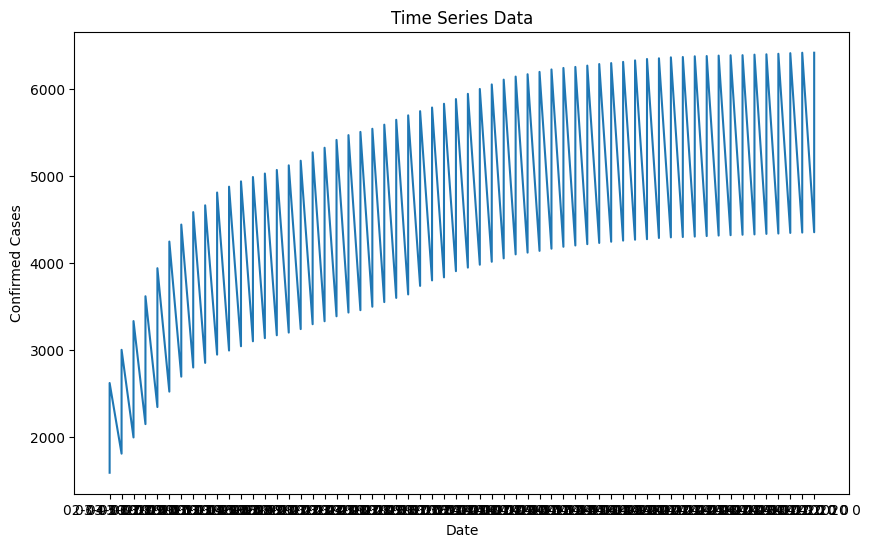

ADF Statistic: -1.6020976922858874
p-value: 0.4825396470515856
Critical Values: {'1%': -3.4901313156261384, '5%': -2.8877122815688776, '10%': -2.5807296460459184}


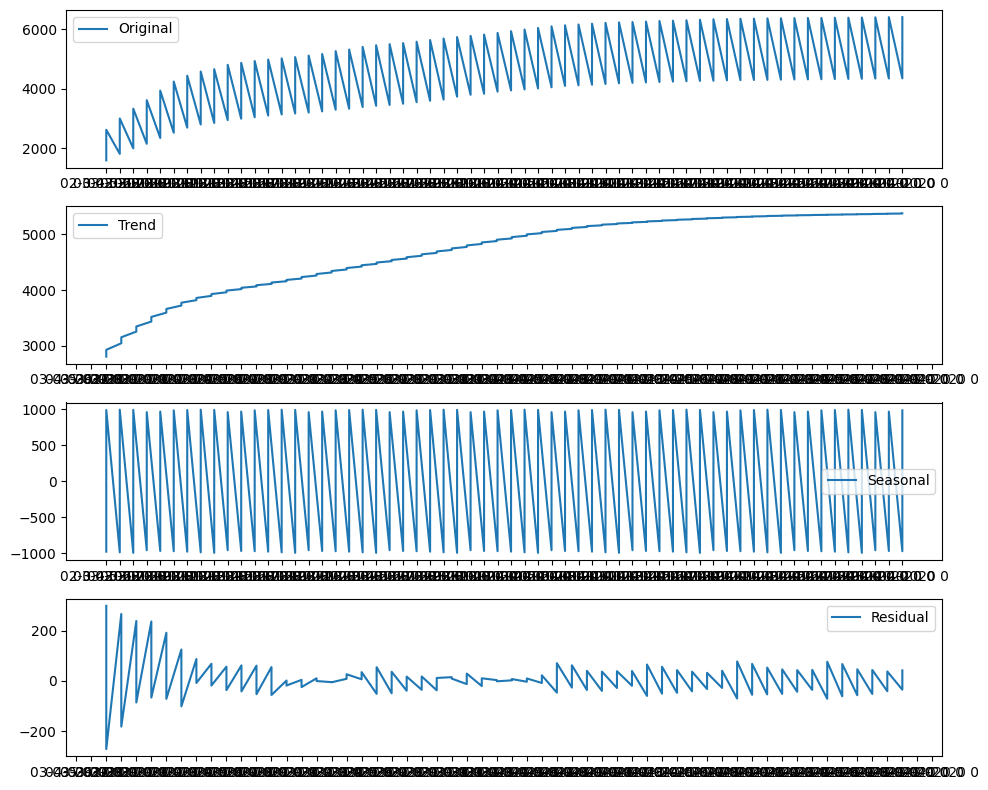

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Load time series data
data = pd.read_csv('TimeGender.csv', parse_dates=[['date', 'time']], index_col=0)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['confirmed'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

# Decompose the time series data
decomposition = seasonal_decompose(data['confirmed'], model='additive', period=12)

# Assuming a seasonal period of 12 months
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data['confirmed'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()

# Check for stationarity using Augmented Dickey-Fuller test
adf_result = adfuller(data['confirmed'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

# Identify the trend pattern
plt.show()
